## Introduction to Data Science

### Predictive Analysis - numerical data with regularization

#### Inspired by [this repo](https://github.com/Weesper1985/Predict_real_estate_prices), codes [here](https://www.kaggle.com/dhainjeamita/linear-regression/code) and [here](https://www.kaggle.com/vikrishnan/house-sales-price-using-regression). Used [this data](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime). Tried using [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html) techniques

In [1]:
import os
import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

%matplotlib inline
#%matplotlib notebook
#matplotlib.rcdefaults()
#matplotlib.verbose.set_level('silent')

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Importing the datasets and exploring data

In [2]:
datapath = "../datasets/CSVs/"
outputs = "../outputs/"

In [3]:
! ls ../datasets/CSVs/communities.*

../datasets/CSVs/communities.data  ../datasets/CSVs/communities.names


In [4]:
! head -n10 ../datasets/CSVs/communities.names

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real


In [5]:
! head -n5 ../datasets/CSVs/communities.data

8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.9,0.12,0.17,0.34,0.47,0.29,0.32,0.2,1,0.37,0.72,0.34,0.6,0.29,0.15,0.43,0.39,0.4,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.1,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.4,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0,0.12,0.42,0.5,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.2,0.06,0.04,0.9,0.5,0.32,0.14,0.2
53,?,?,Tukwilacity,1,0,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.3,0.22,0.35,0.01,0.24,0.14,0.24,0.3,0.27,0.73,0.57,0.15,0.42,0.36,1,0.63,0.91,1,0.29,0.43,0.47,0.6,0.39,0.46,0.53,0,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.1,0.16,0.1,0.17,0.29,0.17,0.26,0.2,0.82,0,0.02,0.79,0.24,0.02,0.25,0.65,0

In [6]:
names = open(os.path.join(datapath, 'communities.names'), 'r').readlines()
attributes = [n for n in names if n.startswith('@attribute')]
attributes = [a.split()[1] for a in attributes]
print(len(attributes))
print(attributes)

128
['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEn

In [7]:
df = pd.read_csv(os.path.join(datapath, 'communities.data'), 
                 na_values='?', 
                 header=None, 
                 names=attributes)
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [8]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 128 columns):
state                    1994 non-null int64
county                   820 non-null float64
community                817 non-null float64
communityname            1994 non-null object
fold                     1994 non-null int64
population               1994 non-null float64
householdsize            1994 non-null float64
racepctblack             1994 non-null float64
racePctWhite             1994 non-null float64
racePctAsian             1994 non-null float64
racePctHisp              1994 non-null float64
agePct12t21              1994 non-null float64
agePct12t29              1994 non-null float64
agePct16t24              1994 non-null float64
agePct65up               1994 non-null float64
numbUrban                1994 non-null float64
pctUrban                 1994 non-null float64
medIncome                1994 non-null float64
pctWWage                 1994 non-null float64
pctWFa

In [9]:
#non numeric
columns1 = ['state', 'county', 'community', 'communityname', 'fold']

#many missing values
columns2 = ['LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 
            'LemasTotalReq',  'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 
            'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 
            'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
            'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
            'LemasGangUnitDeploy', 'PolicBudgPerPop', 'OtherPerCap']

df.drop(columns=columns1, inplace=True)
df.drop(columns=columns2, inplace=True)

In [10]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
population               1994 non-null float64
householdsize            1994 non-null float64
racepctblack             1994 non-null float64
racePctWhite             1994 non-null float64
racePctAsian             1994 non-null float64
racePctHisp              1994 non-null float64
agePct12t21              1994 non-null float64
agePct12t29              1994 non-null float64
agePct16t24              1994 non-null float64
agePct65up               1994 non-null float64
numbUrban                1994 non-null float64
pctUrban                 1994 non-null float64
medIncome                1994 non-null float64
pctWWage                 1994 non-null float64
pctWFarmSelf             1994 non-null float64
pctWInvInc               1994 non-null float64
pctWSocSec               1994 non-null float64
pctWPubAsst              1994 non-null float64
pctWRetire               1994 non-null float64

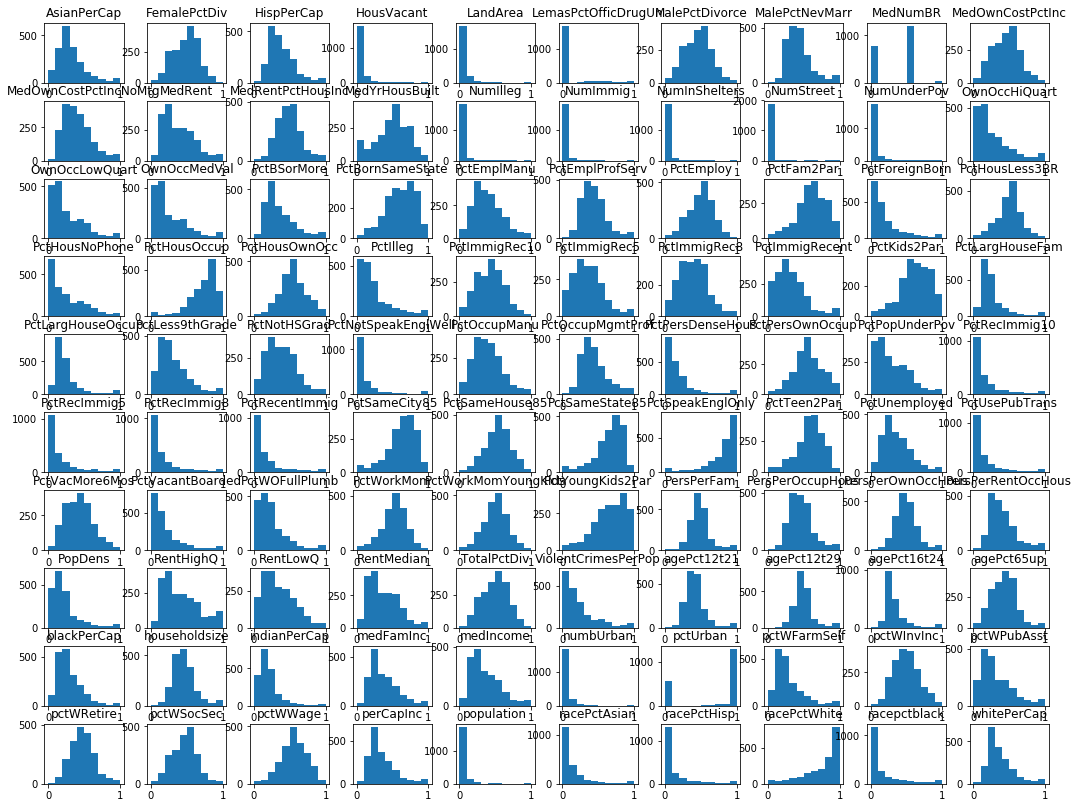

In [11]:
# histograms
df.hist(bins=10,figsize=(18,14),grid=False);

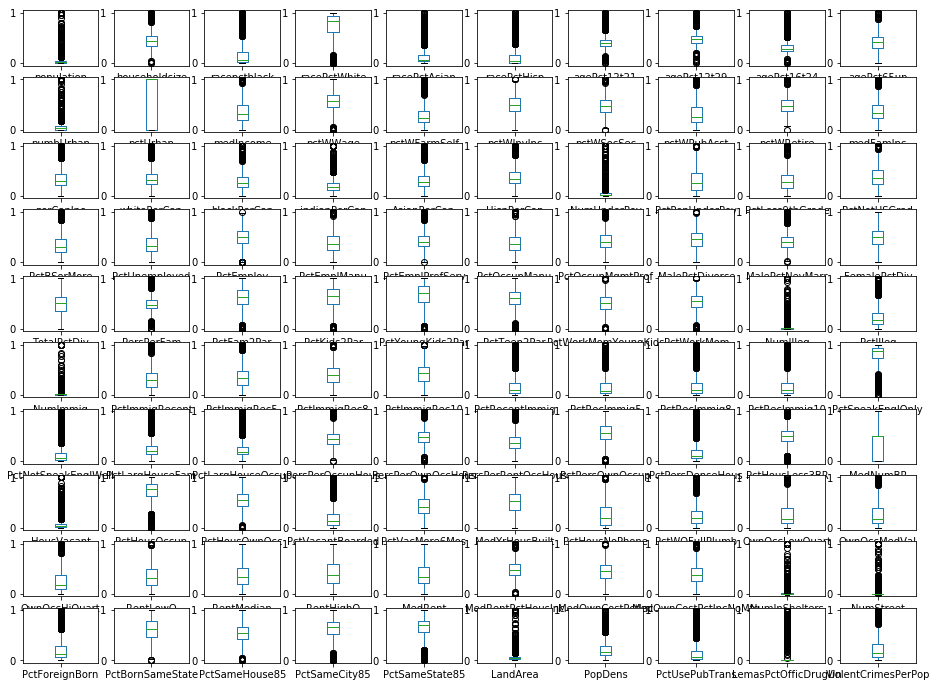

In [12]:
df.plot(kind='box', subplots=True, layout=(10,10), sharex=False, sharey=False, figsize=(16,12))
plt.show()

In [13]:
# correlation
pd.set_option('precision', 2)
df.corr(method='pearson')

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
population,1.00e+00,-4.61e-02,2.31e-01,-3.01e-01,1.82e-01,1.56e-01,6.37e-03,0.13,7.56e-02,-1.02e-01,...,1.73e-01,-0.13,-1.24e-01,1.61e-03,-8.96e-02,7.14e-01,2.32e-01,2.70e-01,4.66e-01,0.37
householdsize,-4.61e-02,1.00e+00,-6.71e-02,-2.36e-01,2.02e-01,4.69e-01,5.20e-01,0.37,2.95e-01,-6.13e-01,...,3.11e-01,-0.05,-5.78e-02,-1.03e-01,-3.28e-03,-1.51e-02,-4.07e-03,-5.15e-02,-9.44e-02,-0.03
racepctblack,2.31e-01,-6.71e-02,1.00e+00,-7.94e-01,-1.07e-01,-6.66e-02,1.22e-01,0.15,1.34e-01,5.29e-02,...,-9.81e-02,0.09,-4.56e-02,5.64e-02,-2.89e-03,1.50e-01,9.51e-02,1.47e-01,2.61e-01,0.63
racePctWhite,-3.01e-01,-2.36e-01,-7.94e-01,1.00e+00,-2.70e-01,-4.44e-01,-1.94e-01,-0.27,-1.84e-01,1.36e-01,...,-3.73e-01,0.11,1.65e-01,-1.97e-02,3.24e-02,-1.31e-01,-3.37e-01,-2.16e-01,-2.76e-01,-0.68
racePctAsian,1.82e-01,2.02e-01,-1.07e-01,-2.70e-01,1.00e+00,2.67e-01,-2.50e-02,0.10,5.28e-02,-2.72e-01,...,6.57e-01,-0.41,-1.90e-01,-1.95e-01,-1.98e-01,-1.08e-03,3.90e-01,2.97e-01,1.02e-01,0.04
racePctHisp,1.56e-01,4.69e-01,-6.66e-02,-4.44e-01,2.67e-01,1.00e+00,1.46e-01,0.21,8.63e-02,-2.28e-01,...,6.84e-01,-0.26,-1.66e-01,1.45e-02,2.02e-04,1.16e-02,3.70e-01,7.84e-02,1.25e-01,0.29
agePct12t21,6.37e-03,5.20e-01,1.22e-01,-1.94e-01,-2.50e-02,1.46e-01,1.00e+00,0.82,8.95e-01,-4.11e-01,...,-6.85e-02,0.08,-3.57e-01,-3.61e-01,-1.51e-01,2.57e-02,-9.57e-02,-1.73e-01,1.30e-03,0.06
agePct12t29,1.30e-01,3.67e-01,1.53e-01,-2.67e-01,1.01e-01,2.06e-01,8.22e-01,1.00,9.34e-01,-5.21e-01,...,7.77e-02,-0.05,-5.59e-01,-5.06e-01,-3.18e-01,6.25e-02,1.20e-01,-2.35e-02,1.17e-01,0.15
agePct16t24,7.56e-02,2.95e-01,1.34e-01,-1.84e-01,5.28e-02,8.63e-02,8.95e-01,0.93,1.00e+00,-3.23e-01,...,5.59e-03,-0.01,-4.63e-01,-4.79e-01,-2.75e-01,3.16e-02,4.60e-02,-4.04e-02,8.32e-02,0.10
agePct65up,-1.02e-01,-6.13e-01,5.29e-02,1.36e-01,-2.72e-01,-2.28e-01,-4.11e-01,-0.52,-3.23e-01,1.00e+00,...,-1.40e-01,0.15,3.94e-01,3.73e-01,2.56e-01,-1.24e-01,1.54e-02,6.79e-03,-1.02e-02,0.07


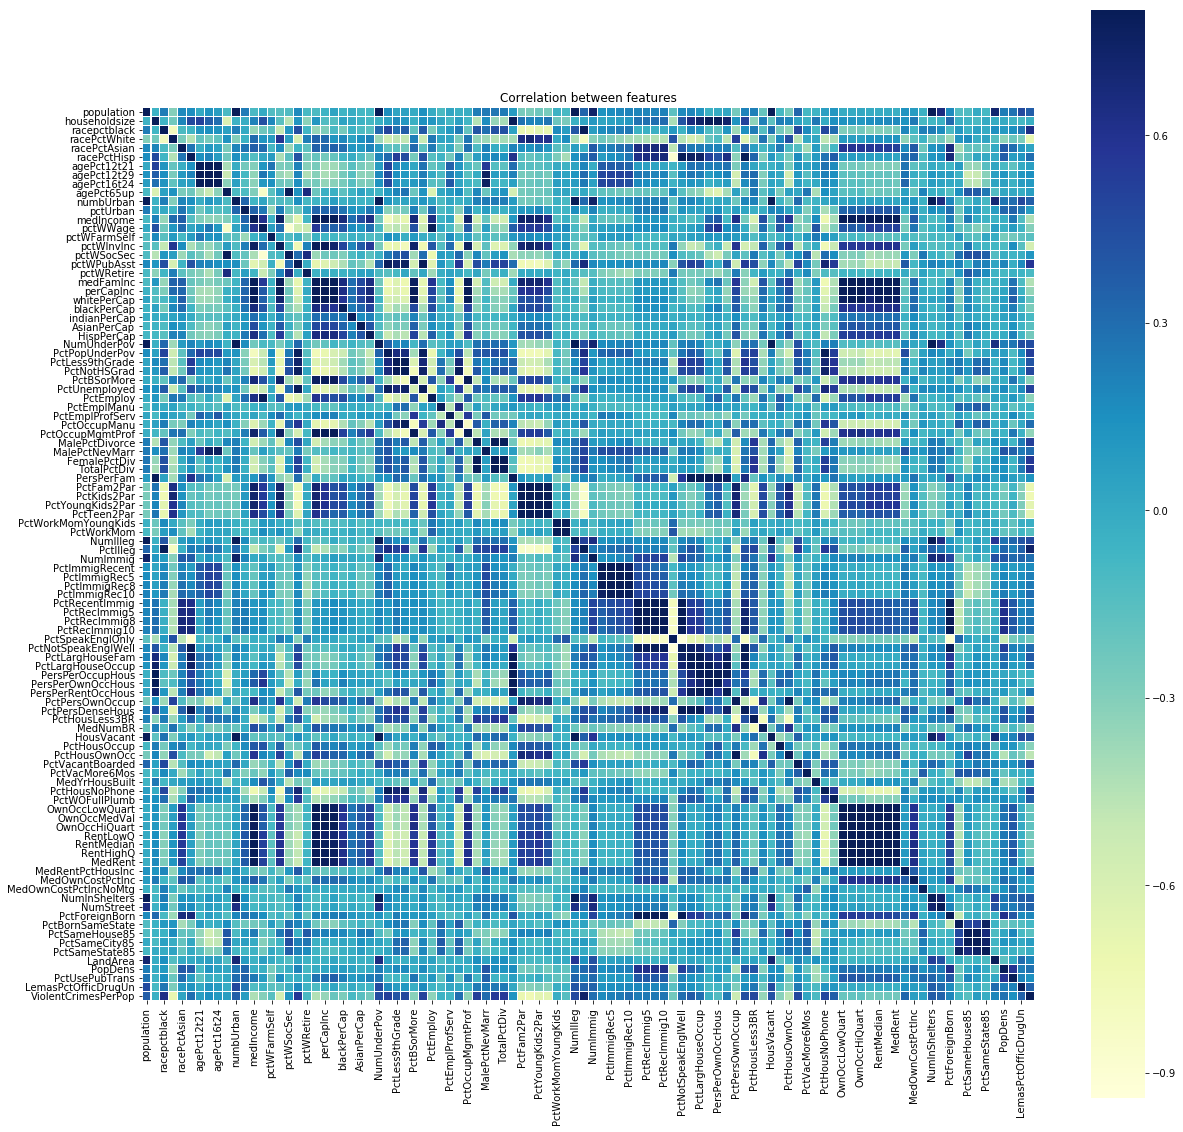

In [14]:
corr=df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=False,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [15]:
crimes = df['ViolentCrimesPerPop']

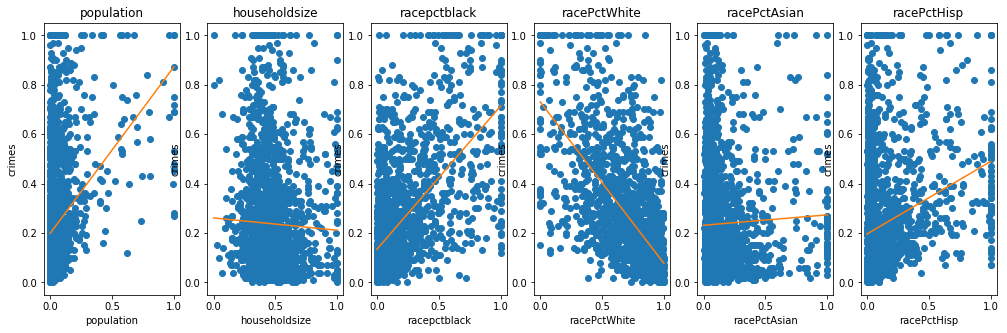

In [16]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[0:6]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

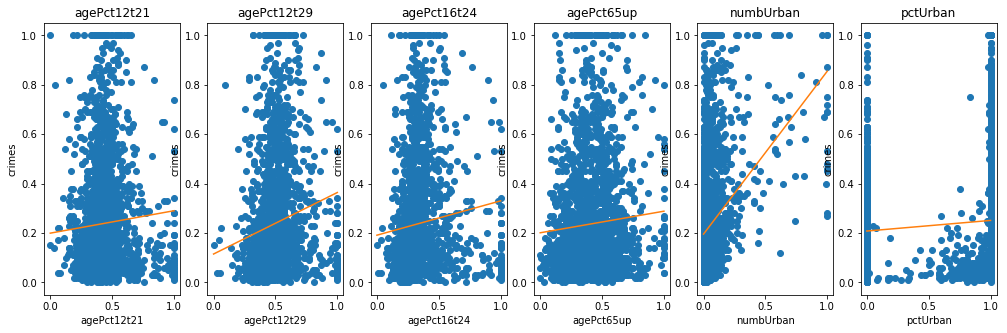

In [17]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[6:12]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

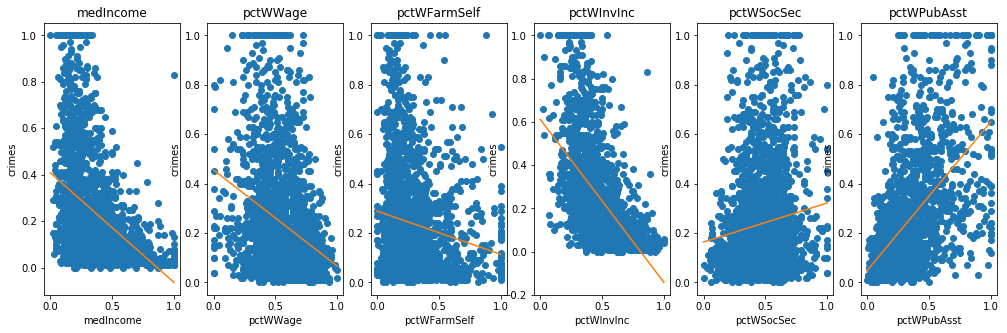

In [18]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[12:18]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

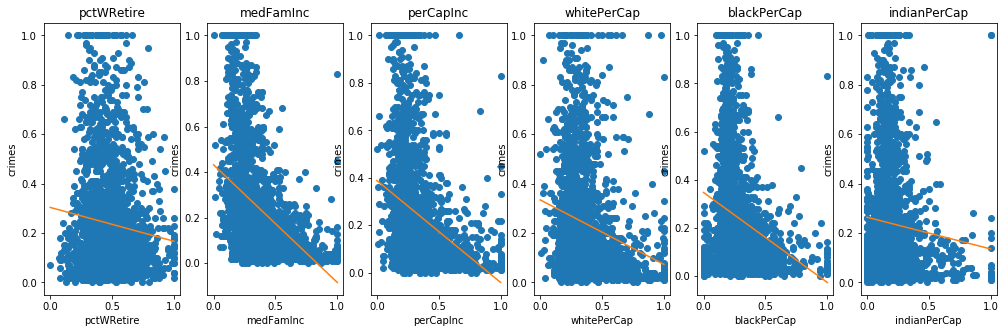

In [19]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[18:24]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

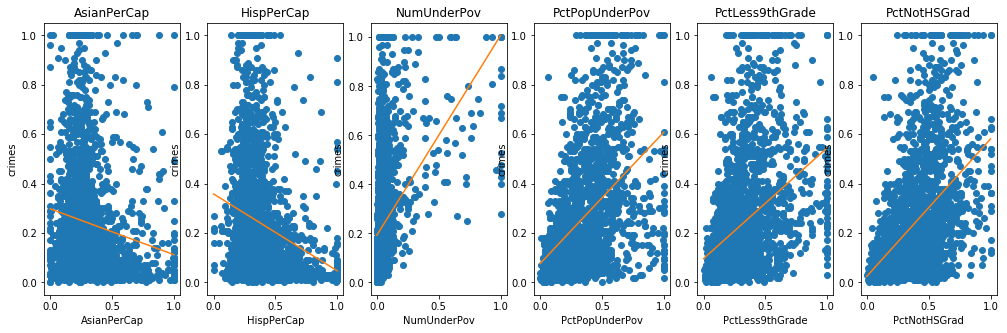

In [20]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[24:30]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

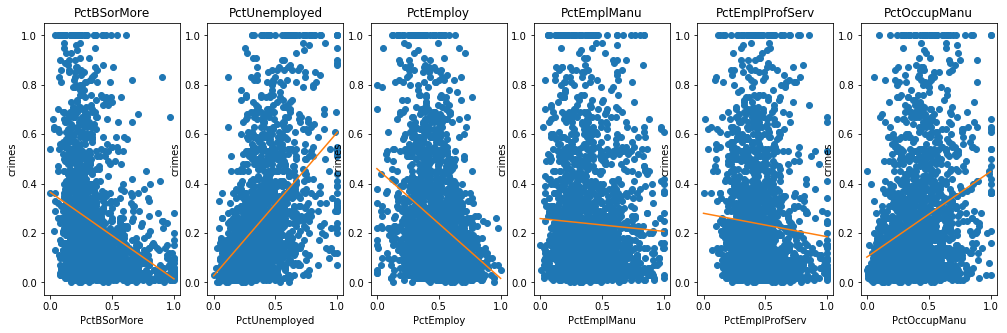

In [21]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[30:36]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

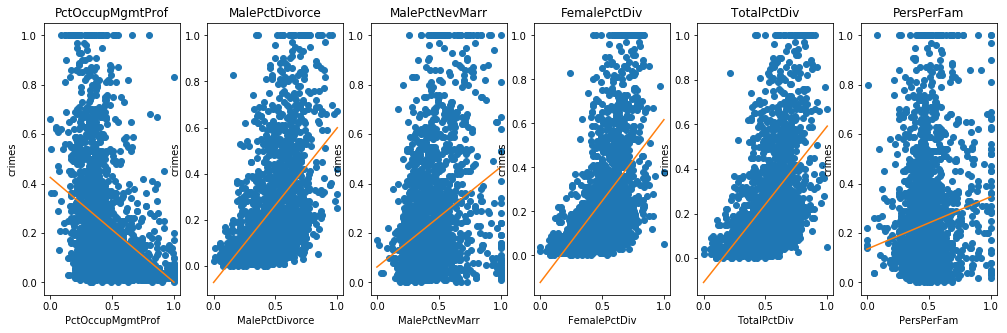

In [22]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[36:42]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

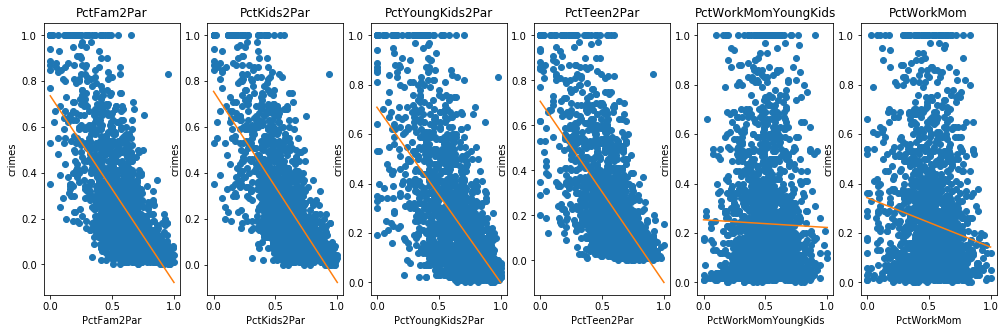

In [23]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[42:48]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

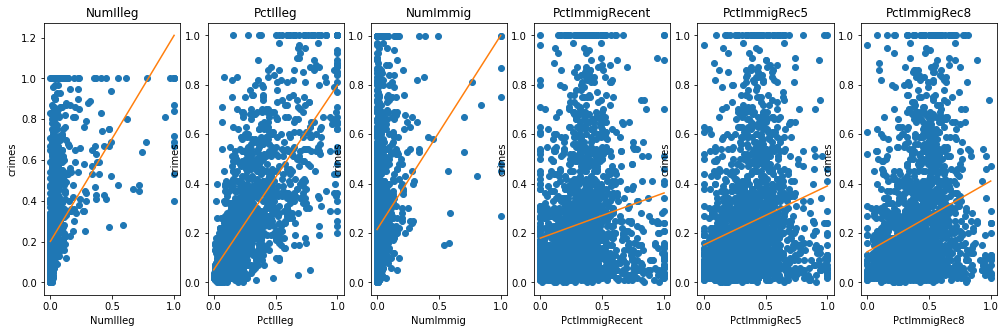

In [24]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[48:54]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

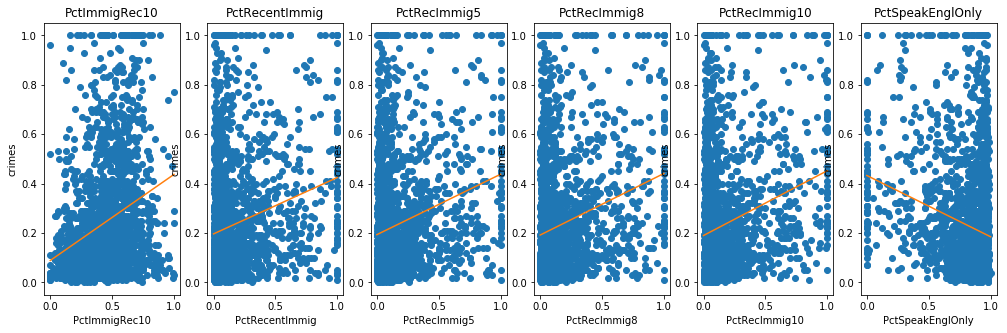

In [25]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[54:60]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

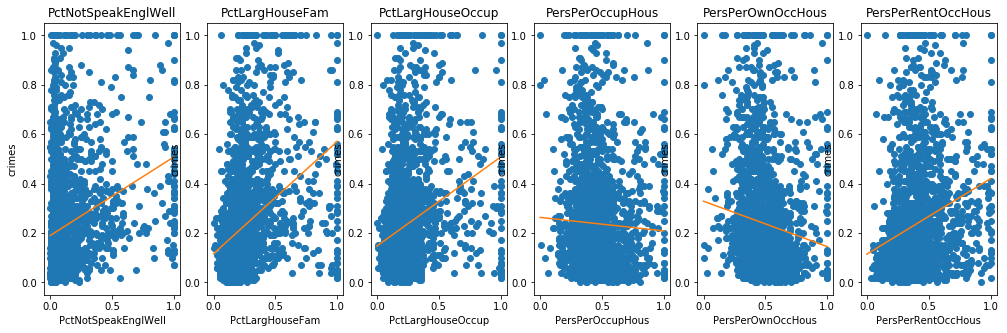

In [26]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[60:66]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

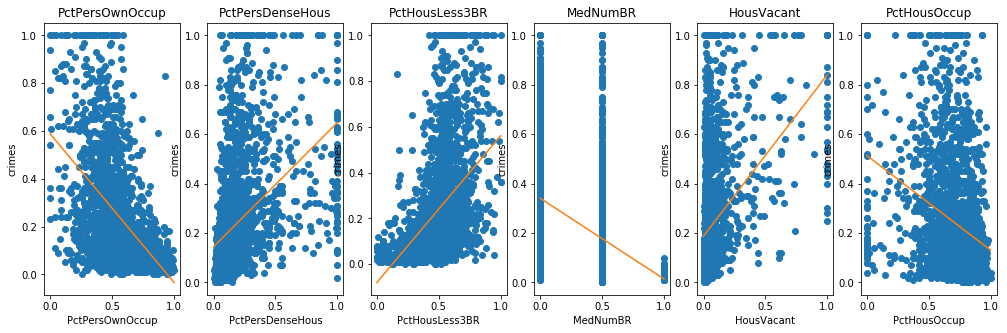

In [27]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[66:72]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

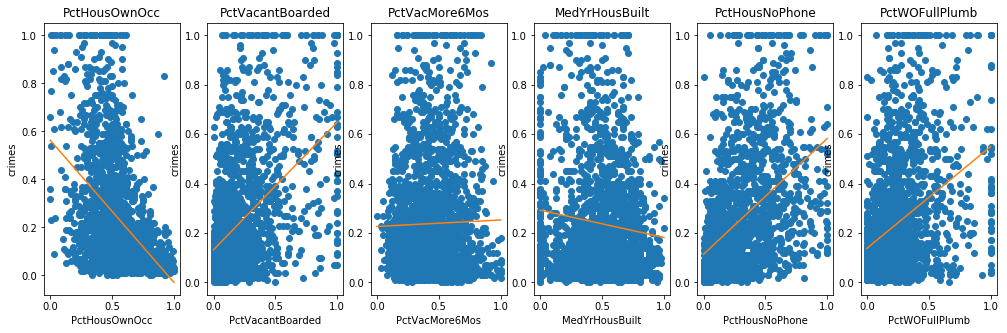

In [28]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[72:78]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

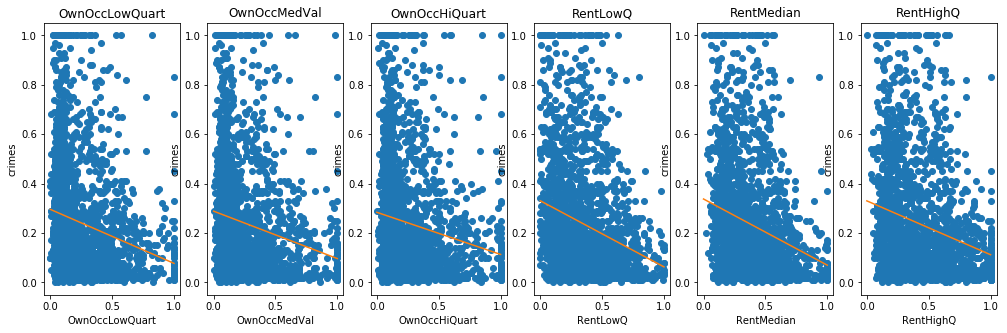

In [29]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[78:84]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

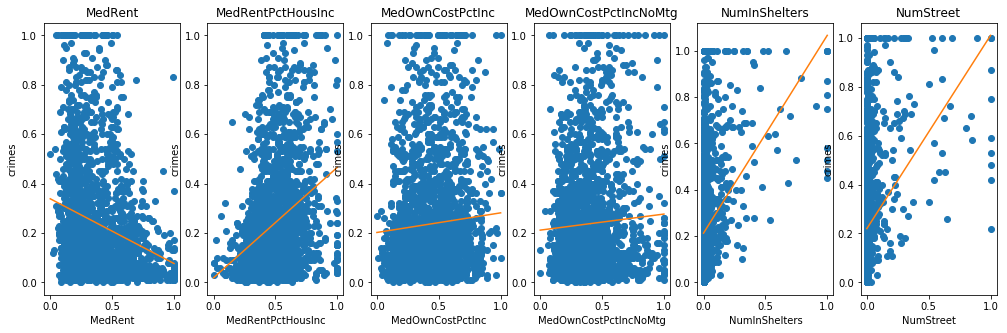

In [30]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[84:90]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

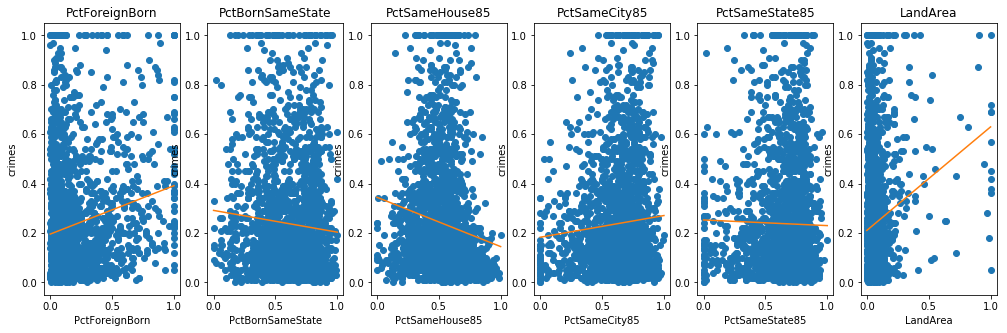

In [31]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[90:96]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

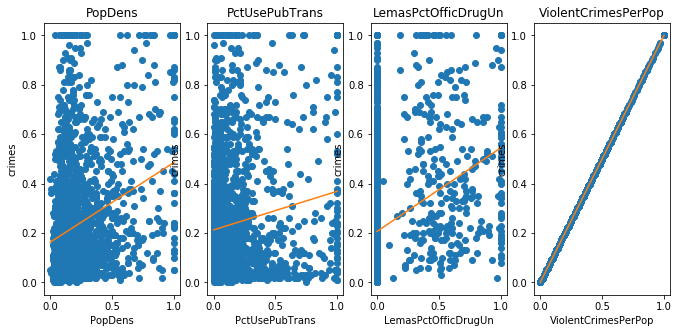

In [32]:
plt.figure(figsize=(20, 5))

for i, col in enumerate(df.columns[96:]):
    plt.subplot(1, 7, i+1)
    x = df[col]
    y = crimes
    plt.plot(x, y, 'o')
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('crimes')

The point here is to test 'crimes' in a very lean way. 
We'll do this paying attention to: Histogram - Kurtosis and skewness. 
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


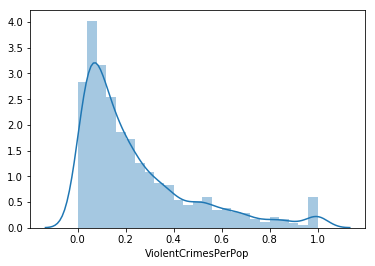

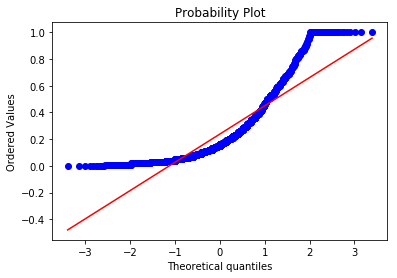

In [33]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(crimes, hist=True);
fig = plt.figure()
res = stats.probplot(crimes, plot=plt)

In [34]:
#Prepare Data

# split into input (X) and output (Y) variables
X = df.values[:,0:-1]
y = df.values[:,99]

print(X.shape)
print(y.shape)

(1994, 99)
(1994,)


In [35]:
# Split-out validation dataset
validation_size = 0.20
seed = 0
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [36]:
# Test options and evaluation metric using Root Mean Square error method
#http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

num_folds = 15
#score = 'neg_mean_squared_error'
score = 'r2'

In [37]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RIDGE', Ridge()))
models.append(('RIDGECV', RidgeCV()))
models.append(('MLPR', MLPRegressor()))

In [38]:
results1 = []
names1 = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results1.append(cv_results)
    names1.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.640510 (0.051512)
LASSO: -0.014786 (0.021318)
EN: -0.014786 (0.021318)
KNN: 0.585169 (0.076732)
CART: 0.213930 (0.193148)
SVR: 0.650358 (0.041477)
RIDGE: 0.648789 (0.048226)
RIDGECV: 0.648789 (0.048226)
MLPR: 0.603934 (0.067100)


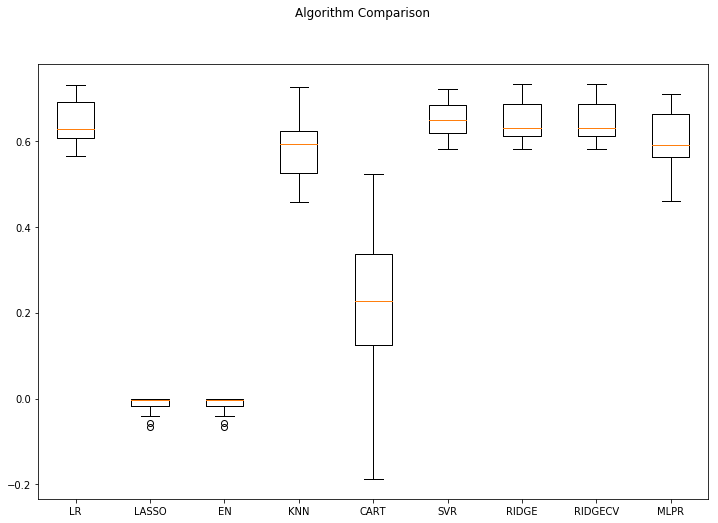

In [39]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

Standardizing the dataset

In [40]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledRIDGECV', Pipeline([('Scaler', StandardScaler()),('RIDGECV', RidgeCV())])))
pipelines.append(('ScaledMLPR', Pipeline([('Scaler', StandardScaler()),('MLPR', MLPRegressor())])))
results2 = []
names2 = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results2.append(cv_results)
    names2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.640510 (0.051512)
ScaledLASSO: -0.014786 (0.021318)
ScaledEN: -0.014786 (0.021318)
ScaledKNN: 0.581058 (0.074859)
ScaledCART: 0.178494 (0.196289)
ScaledSVR: 0.601032 (0.061832)
ScaledRIDGE: 0.642448 (0.050975)
ScaledRIDGECV: 0.646582 (0.050319)
ScaledMLPR: 0.166205 (0.166565)


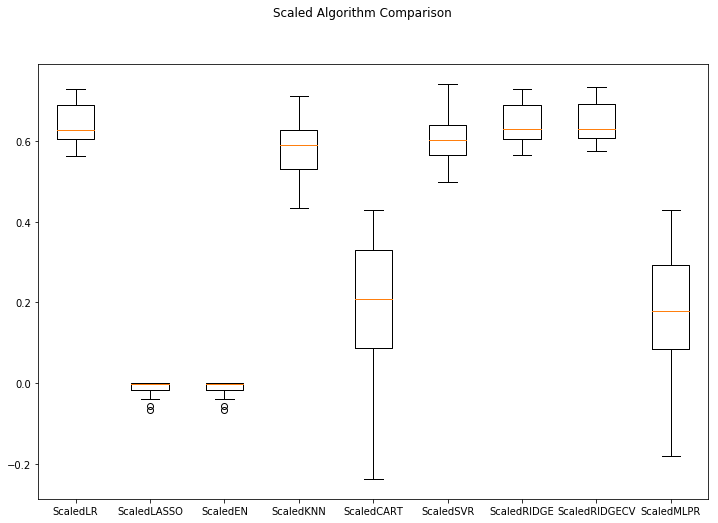

In [41]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

KNN Algorithm tuning

In [42]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.597845 using {'n_neighbors': 11}
0.358865 (0.109193) with: {'n_neighbors': 1}
0.562023 (0.079035) with: {'n_neighbors': 3}
0.580391 (0.073541) with: {'n_neighbors': 5}
0.586578 (0.053678) with: {'n_neighbors': 7}
0.591339 (0.055840) with: {'n_neighbors': 9}
0.597845 (0.048930) with: {'n_neighbors': 11}
0.597824 (0.046092) with: {'n_neighbors': 13}
0.594127 (0.043755) with: {'n_neighbors': 15}
0.597473 (0.038855) with: {'n_neighbors': 17}
0.597390 (0.041282) with: {'n_neighbors': 19}
0.596278 (0.041127) with: {'n_neighbors': 21}


Lasso Algorithm Tuning

In [43]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
alpha_values = np.linspace(0.004,0.1,10)
param_grid = dict(alpha=alpha_values)
model = Lasso()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.648798 using {'alpha': 0.004}
0.648798 (0.042461) with: {'alpha': 0.004}
0.629567 (0.043402) with: {'alpha': 0.014666666666666666}
0.608239 (0.043897) with: {'alpha': 0.025333333333333333}
0.586000 (0.042254) with: {'alpha': 0.036000000000000004}
0.558260 (0.039380) with: {'alpha': 0.04666666666666666}
0.523665 (0.036877) with: {'alpha': 0.05733333333333333}
0.489980 (0.035011) with: {'alpha': 0.068}
0.454539 (0.033476) with: {'alpha': 0.07866666666666666}
0.413838 (0.032167) with: {'alpha': 0.08933333333333333}
0.368039 (0.031066) with: {'alpha': 0.1}


Ridge Algorithm Tuning

In [44]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
alpha_values = [0, 1, 10, 20, 50, 100, 200, 500, 1000]
param_grid = dict(alpha=alpha_values)
model = Ridge()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.649095 using {'alpha': 100}
0.640523 (0.051508) with: {'alpha': 0}
0.642469 (0.050975) with: {'alpha': 1}
0.646620 (0.050321) with: {'alpha': 10}
0.647922 (0.049701) with: {'alpha': 20}
0.648986 (0.048221) with: {'alpha': 50}
0.649095 (0.046507) with: {'alpha': 100}
0.648504 (0.044186) with: {'alpha': 200}
0.645650 (0.040145) with: {'alpha': 500}
0.640063 (0.036460) with: {'alpha': 1000}


ElasticNet Algorithm Tuning

In [45]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
l1_values = np.linspace(0.00001,0.001, 12)
param_grid = dict(l1_ratio=l1_values)
model = ElasticNet()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.634383 using {'l1_ratio': 1e-05}
0.634383 (0.034189) with: {'l1_ratio': 1e-05}
0.634279 (0.034105) with: {'l1_ratio': 0.0001}
0.634177 (0.034028) with: {'l1_ratio': 0.00019}
0.634088 (0.033960) with: {'l1_ratio': 0.00028000000000000003}
0.633998 (0.033894) with: {'l1_ratio': 0.00037000000000000005}
0.633897 (0.033824) with: {'l1_ratio': 0.00046000000000000007}
0.633786 (0.033755) with: {'l1_ratio': 0.00055}
0.633665 (0.033691) with: {'l1_ratio': 0.00064}
0.633531 (0.033628) with: {'l1_ratio': 0.0007300000000000001}
0.633396 (0.033558) with: {'l1_ratio': 0.0008200000000000001}
0.633263 (0.033492) with: {'l1_ratio': 0.0009100000000000001}
0.633125 (0.033433) with: {'l1_ratio': 0.001}


Plotting the tunned algorithms

In [46]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso(alpha=0.004))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(l1_ratio=1e-05))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(n_neighbors=11))])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge(alpha=100))])))
pipelines.append(('ScaledRIDGECV', Pipeline([('Scaler', StandardScaler()),('RIDGECV', RidgeCV())])))
pipelines.append(('ScaledMLPR', Pipeline([('Scaler', StandardScaler()),('MLPR', MLPRegressor())])))
results2 = []
names2 = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results2.append(cv_results)
    names2.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.640510 (0.051512)
ScaledLASSO: 0.648736 (0.042521)
ScaledEN: 0.634372 (0.034389)
ScaledKNN: 0.595102 (0.048826)
ScaledCART: 0.228873 (0.190037)
ScaledSVR: 0.601032 (0.061832)
ScaledRIDGE: 0.649038 (0.046560)
ScaledRIDGECV: 0.646582 (0.050319)
ScaledMLPR: 0.164570 (0.173077)


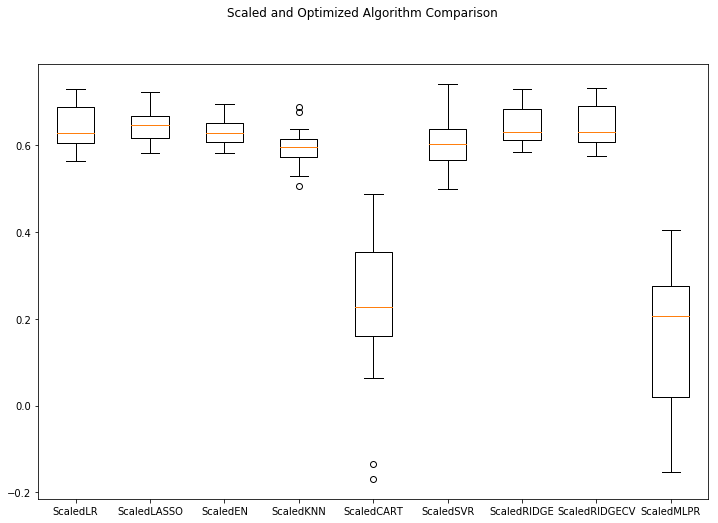

In [47]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled and Optimized Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results2)
ax.set_xticklabels(names2)
plt.show()

Ensembles

In [48]:
ensembles = []
ensembles.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(n_neighbors=11))])))
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results3 = []
names3 = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results3.append(cv_results)
    names3.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledKNN: 0.595102 (0.048826)
ScaledAB: 0.462043 (0.096096)
ScaledGBM: 0.635041 (0.056466)
ScaledRF: 0.603880 (0.054021)
ScaledET: 0.632399 (0.058529)


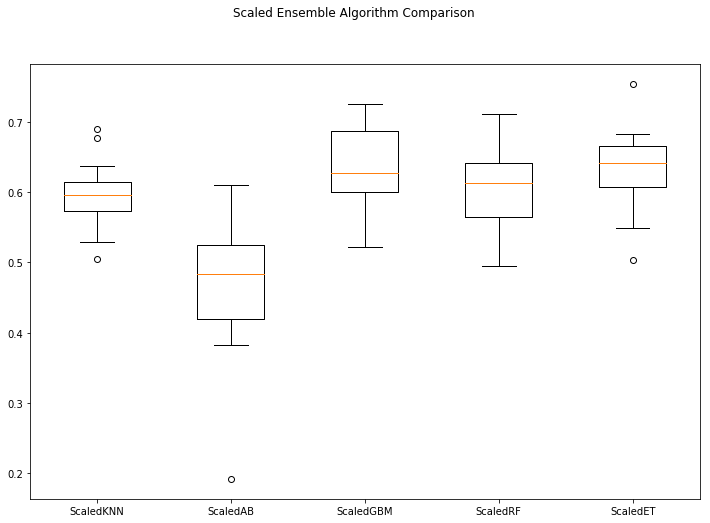

In [49]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results3)
ax.set_xticklabels(names3)
plt.show()

GBM Algorithm Tuning

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([10,25,50,100,150,200,250,300,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=score, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Summarizing all the optimized results

In [58]:
results = []
names = []
pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso(alpha=0.004))])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet(l1_ratio=1e-05))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(n_neighbors=11))])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge(alpha=100))])))
pipelines.append(('ScaledRIDGECV', Pipeline([('Scaler', StandardScaler()),('RIDGECV', RidgeCV())])))
pipelines.append(('ScaledMLPR', Pipeline([('Scaler', StandardScaler()),('MLPR', MLPRegressor())])))
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor(n_estimators=50))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=score)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.640510 (0.051512)
ScaledLASSO: 0.648736 (0.042521)
ScaledEN: 0.634372 (0.034389)
ScaledKNN: 0.595102 (0.048826)
ScaledCART: 0.216118 (0.172579)
ScaledSVR: 0.601032 (0.061832)
ScaledRIDGE: 0.649038 (0.046560)
ScaledRIDGECV: 0.646582 (0.050319)
ScaledMLPR: 0.145058 (0.236311)
ScaledAB: 0.457754 (0.097601)
ScaledGBM: 0.641123 (0.050667)
ScaledRF: 0.589867 (0.060413)
ScaledET: 0.614464 (0.068025)


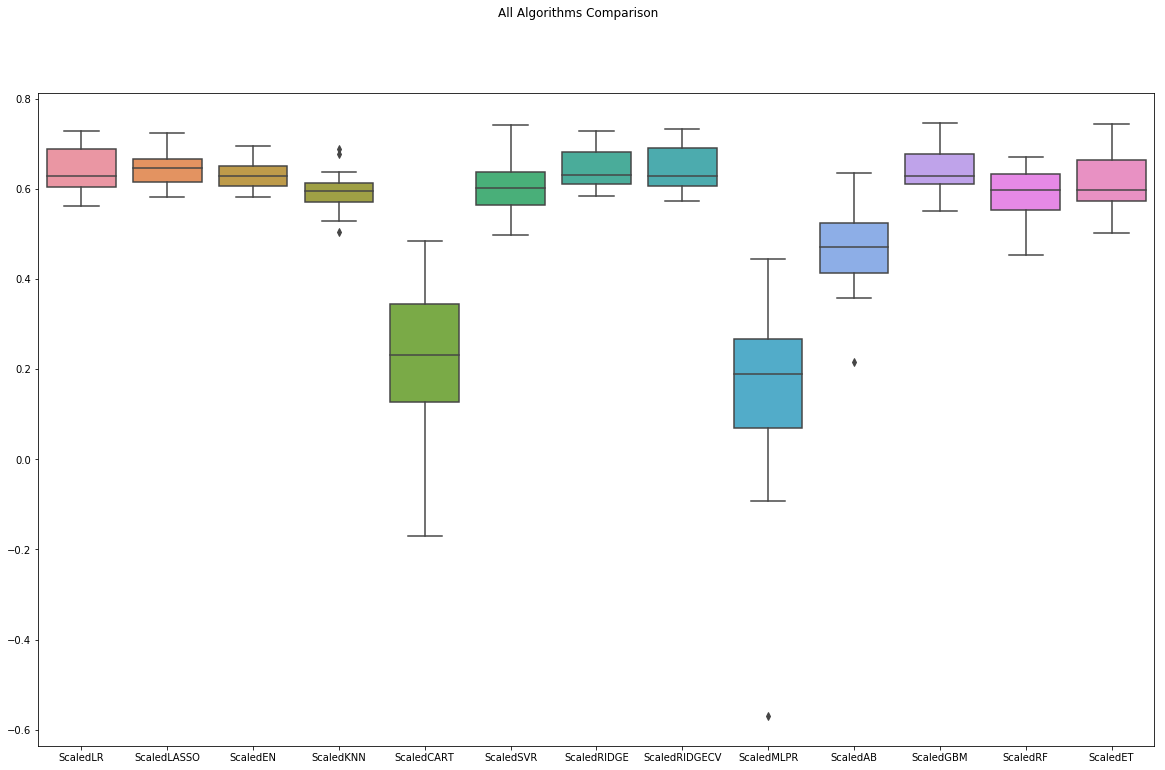

In [59]:
fig = plt.figure(figsize=(20,12))
fig.suptitle('All Algorithms Comparison')
ax = fig.add_subplot(111)
#plt.boxplot(results, widths=0.5)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.show()

So our chosen Algorithm is GBM

Tune scaled GBM

In [52]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=40)
model.fit(rescaledX, Y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation, predictions))

0.021748973554711223


Trying Keras Regression

In [53]:
os.environ["KERAS_BACKEND"] = "theano"
#os.environ["KERAS_BACKEND"] = "tensorflow"

import keras

from keras import backend as K
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.
ERROR (theano.gpuarray): Could not initialize pygpu, support disabled
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/theano/gpuarray/__init__.py", line 220, in <module>
    use(config.device)
  File "/usr/local/lib/python3.6/dist-packages/theano/gpuarray/__init__.py", line 207, in use
    init_dev(device, preallocate=preallocate)
  File "/usr/local/lib/python3.6/dist-packages/theano/gpuarray/__init__.py", line 110, in init_dev
    context.cudnn_handle = dnn._make_handle(context)
  File "/usr/local/lib/python3.6/dist-packages/theano/gpuarray/dnn.py", line 118, in _make_handle
    cudnn = _dnn_lib()
  File "/usr/local/lib/python3.6/d

In [54]:
# define base model
def baseline_model(input_dim):
    # create model
    model = Sequential()
    model.add(Dense(input_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [55]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model(X.shape[1]), epochs=100, batch_size=5, verbose=0)

In [56]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

TypeError: __call__() missing 1 required positional argument: 'inputs'

In [ ]:
# evaluate model with standardized dataset
numpy.random.seed(seed)
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))